In [48]:
import stuett
from stuett.global_config import get_setting, setting_exists
import argparse
from pathlib import Path
from datetime import datetime
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import utils
import numpy as np

<xarray.DataArray 'name' (name: 6)>
array(['temperature_5cm', 'temperature_10cm', 'temperature_20cm',
       'temperature_30cm', 'temperature_50cm', 'temperature_100cm'],
      dtype='<U17')
Coordinates:
  * name     (name) <U17 'temperature_5cm' ... 'temperature_100cm'
    unit     (name) <U2 '°C' '°C' '°C' '°C' '°C' '°C'

In [96]:
# load data
temp_north = utils.load_data("MH30_temperature_rock_2017.csv")
temp_south = utils.load_data("MH10_temperature_rock_2017.csv")
temp_south = temp_south[:,7:] # only keep temerature data
rmeter = utils.load_data("MH15_radiometer__conv_2017.csv")
solar = rmeter[:,3]
timestamp = np.asarray([i  for j in range(365) for i in range(24)])

In [32]:
temp_north.coords["name"]
depth_north = [5,10,20,30,50,100]

In [33]:
temp_south.coords["name"]
depth_south = [10,35,60,85]

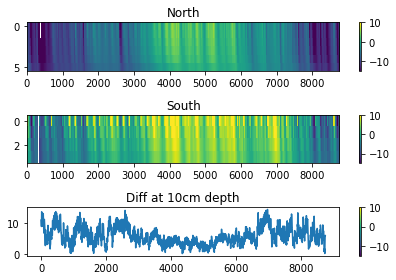

In [34]:
plt.figure()
vmin = -15
vmax = 10
plt.subplot(3,1,1)
plt.imshow(temp_north.transpose(),aspect='auto',vmin=vmin,vmax=vmax)
plt.colorbar()
plt.title('North')

plt.subplot(3,1,2)
plt.imshow(temp_south.transpose(),aspect='auto',vmin=vmin,vmax=vmax)
plt.colorbar()
plt.title('South')

plt.subplot(3,1,3)
temp_diff = temp_south[:,1] - temp_north[:,0]
plt.plot(temp_diff)
plt.colorbar()
plt.title('Diff at 10cm depth')

plt.tight_layout()
plt.show()


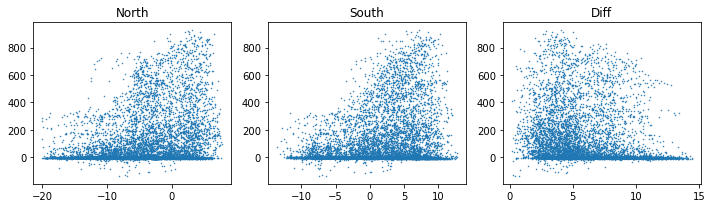

In [81]:
# relation between temperature difference and sunshie
plt.figure(figsize=[10, 3])

plt.subplot(1,3,1)
plt.scatter(temp_north[:,0],solar,marker='.',s=1)
plt.title('North')

plt.subplot(1,3,2)
plt.scatter(temp_south[:,1],solar,marker='.',s=1)
plt.title('South')

plt.subplot(1,3,3)
plt.scatter(temp_diff,solar,marker='.',s=1)
plt.title('Diff')

plt.tight_layout()

ValueError: Dimensions of labels and X must be compatible

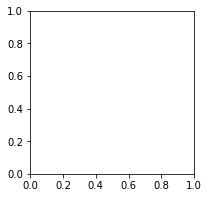

In [98]:
# relation between temperature difference and daytime
plt.figure(figsize=[10, 3])

plt.subplot(1,3,1)
plt.boxplot(temp_north[:,0],labels=timestamp.transpose())
#plt.scatter(temp_north[:,0],timestamp,marker='.',s=1)
plt.title('North')

plt.subplot(1,3,2)
plt.scatter(temp_south[:,1],timestamp,marker='.',s=1)
plt.title('South')

plt.subplot(1,3,3)
plt.scatter(temp_diff,timestamp,marker='.',s=1)
plt.title('Diff')

plt.tight_layout()

In [100]:
timestamp.shape()

TypeError: 'tuple' object is not callable